<a href="https://colab.research.google.com/github/cshooon/Data_Analysis/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import and setup
%matplotlib inline

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd

pd.set_option('display.precision',2)
pd.set_option('display.max_rows',10)
pd.set_option('display.float_format','{:20,.2f}'.format)
plt.style.use('seaborn')

<ipython-input-3-f4448f4a374f>:13: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
boston=pd.read_csv('/content/drive/MyDrive/Boston.csv',index_col=0)
boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.01,18.00,2.31,0,0.54,6.58,65.20,4.09,1,296,15.30,396.90,4.98,24.00
2,0.03,0.00,7.07,0,0.47,6.42,78.90,4.97,2,242,17.80,396.90,9.14,21.60
3,0.03,0.00,7.07,0,0.47,7.18,61.10,4.97,2,242,17.80,392.83,4.03,34.70
4,0.03,0.00,2.18,0,0.46,7.00,45.80,6.06,3,222,18.70,394.63,2.94,33.40
5,0.07,0.00,2.18,0,0.46,7.15,54.20,6.06,3,222,18.70,396.90,5.33,36.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,0.06,0.00,11.93,0,0.57,6.59,69.10,2.48,1,273,21.00,391.99,9.67,22.40
503,0.05,0.00,11.93,0,0.57,6.12,76.70,2.29,1,273,21.00,396.90,9.08,20.60
504,0.06,0.00,11.93,0,0.57,6.98,91.00,2.17,1,273,21.00,396.90,5.64,23.90
505,0.11,0.00,11.93,0,0.57,6.79,89.30,2.39,1,273,21.00,393.45,6.48,22.00


# 새 섹션

In [ ]:
from sklearn import linear_model

ols_sl=linear_model.LinearRegression(fit_intercept=True)

x_train=boston['lstat'].values.reshape(-1,1)
y_true=boston['medv']
ols_sl.fit(x_train,y_true)

ols_sl.intercept_,ols_sl.coef_

(34.5538408793831, array([-0.95004935]))

In [ ]:
from sklearn.metrics import mean_squared_error, explained_variance_score, r2_score

y_pred=ols_sl.predict(boston['lstat'].values.reshape(-1,1))

ols_sl_summary={
    'R2' : r2_score(y_true,y_pred),
    'Ex. Var' : explained_variance_score(y_true,y_pred),
    'MSE' : mean_squared_error(y_true,y_pred)
}

for k,v in ols_sl_summary.items():
    print(k,':',v)

R2 : 0.5441462975864797
Ex. Var : 0.5441462975864798
MSE : 38.48296722989415


In [ ]:
import statsmodels.api as sm

x_train=boston['lstat']
y_true=boston['medv']

ols_sm=sm.OLS(y_true,sm.add_constant(x_train))

ols_sm_results=ols_sm.fit()
ols_sm_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Sat, 05 Aug 2023   Prob (F-statistic):           5.08e-88
Time:                        05:08:42   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
ols_sm_results.predict(sm.add_constant([5,10,15]))

array([29.80359411, 25.05334734, 20.30310057])

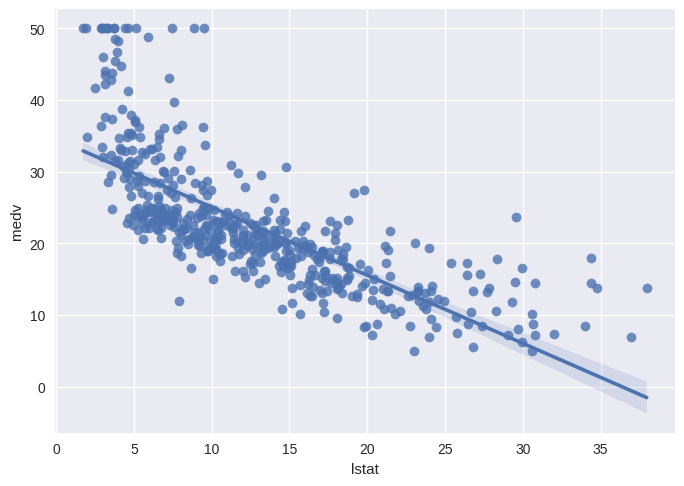

In [ ]:
sns.regplot(x='lstat',y='medv',data=boston);

In [ ]:
x_train=boston[['lstat','age']]
y_true=boston['medv']

ols_sm=sm.OLS(y_true,sm.add_constant(x_train))

ols_sm_result=ols_sm.fit()
ols_sm_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Sat, 05 Aug 2023   Prob (F-statistic):           2.98e-88
Time:                        05:08:42   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.2228      0.731     45.458      0.000      31.787      34.659
lstat         -1.0321      0.048    -21.416      0.000      -1.127      -0.937
age            0.0345      0.012      2.826      0.005       0.011       0.059
==============================================================================
Omnibus:                      124.288   Durbin-Watson:                   0.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              244.026
Skew:                           1.362   Prob(JB):                     1.02e-53
Kurtosis:                       5.038   Cond. No.                         201.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
import statsmodels.formula.api as smf

ols_smf=smf.ols(formula='medv ~ lstat + age', data=boston)

ols_smf_results=ols_smf.fit()
ols_smf_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Sat, 05 Aug 2023   Prob (F-statistic):           2.98e-88
Time:                        05:08:42   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.2228      0.731     45.458      0.000      31.787      34.659
lstat         -1.0321      0.048    -21.416      0.000      -1.127      -0.937
age            0.0345      0.012      2.826      0.005       0.011       0.059
==============================================================================
Omnibus:                      124.288   Durbin-Watson:                   0.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              244.026
Skew:                           1.362   Prob(JB):                     1.02e-53
Kurtosis:                       5.038   Cond. No.                         201.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
ols_smf=smf.ols(formula='medv ~ lstat * age', data=boston)

ols_smf_results=ols_smf.fit()
ols_smf_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Sat, 05 Aug 2023   Prob (F-statistic):           4.86e-88
Time:                        05:08:42   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.0885      1.470     24.553      0.000      33.201      38.976
lstat         -1.3921      0.167     -8.313      0.000      -1.721      -1.063
age           -0.0007      0.020     -0.036      0.971      -0.040       0.038
lstat:age      0.0042      0.002      2.244      0.025       0.001       0.008
==============================================================================
Omnibus:                      135.601   Durbin-Watson:                   0.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              296.955
Skew:                           1.417   Prob(JB):                     3.29e-65
Kurtosis:                       5.461   Cond. No.                     6.88e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
carseats=pd.read_csv('/content/drive/MyDrive/Carseats.csv',index_col=0)
carseats

FileNotFoundError: ignored

In [ ]:
def ols_formula(df, dependent_var, *excluded_cols):
    df_columns=list(df.columns.values)
    df_columns.remove(dependent_var)
    for col in excluded_cols:
        df_columns.remove(col)
    return dependent_var+'~'+'+'.join(df_columns)

ols_smf=smf.ols(formula=ols_formula(boston,'medv'),data=boston)

ols_smf_results=ols_smf.fit()
ols_smf_results.summary()

In [ ]:
form=ols_formula(carseats,'Sales','Urban','US','ShelveLoc')+'+ Income:Advertising + Price:Age + C(ShelveLoc)'
ols_smf=smf.ols(formula=form,data=carseats)

ols_smf_results=ols_smf.fit()
ols_smf_results.summary()

In [ ]:
form=ols_formula(carseats,'Sales')+'+Income:Advertising + Price:Age'
ols_smf=smf.ols(formula=form,data=carseats)

ols_smf_results=ols_smf.fit()
ols_smf_results.summary()